In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from functions import *

## Sommaire
* [Exploration des données](#explorationdesdonnée)
    * [Représentation graphique de la distribution des données](#boxplot)
* [Traitement des valeurs manquantes](#traitementnan)
    * [Première régression linéaire](#regressionlinéaire)
    * [Dataframe alternative](#dataframealternative)
        * [Exploration du dataframe](#exploration)
    * [Matrice de corrélation](#matricedecorrélation)
    * [éegression linéaire du dataframe alternative](#regressionlineairedfalternative)
        * [Test de colinéarité des variables](#testdecolinéarité)
        * [Test de la constance des variances](#constancevariance)
        * [Recherche des valeurs atypiques et/ou influentes](#valatypiqueinfluente)
* [Nouvelle régression linéaire](#nouvellereglin)
    * [Seconde recherche des valeurs atypiques et/ou influentes](#seconderecherche)
* [Prédiction](#prédiction)


# Exploration des données  <a class="anchor" id="explorationdesdonnée"></a>

In [2]:
df_billet = pd.read_csv('billets.csv',sep= ';',decimal=',')

In [3]:
df_billet.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.5,4.4,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
df_billet[df_billet['is_genuine'] == True].count()

is_genuine      1000
diagonal        1000
height_left     1000
height_right    1000
margin_low       971
margin_up       1000
length          1000
dtype: int64

In [5]:
df_billet[df_billet['is_genuine'] == False].count()

is_genuine      500
diagonal        500
height_left     500
height_right    500
margin_low      492
margin_up       500
length          500
dtype: int64

In [6]:
df_billet.isnull().mean()

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      0.024667
margin_up       0.000000
length          0.000000
dtype: float64

In [7]:
df_billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_genuine    1500 non-null   bool  
 1   diagonal      1500 non-null   object
 2   height_left   1500 non-null   object
 3   height_right  1500 non-null   object
 4   margin_low    1463 non-null   object
 5   margin_up     1500 non-null   object
 6   length        1500 non-null   object
dtypes: bool(1), object(6)
memory usage: 71.9+ KB


In [8]:
df_billet.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500,1500,1500,1463,1500,1500
unique,2,159,155,170,285,123,336
top,True,171.99,103.95,103.76,4.08,3.08,113.38
freq,1000,28,30,28,20,35,19


In [9]:
df_billet_ = df_billet.astype('float')

In [10]:
df_billet_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   float64
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


In [11]:
df_billet_.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [12]:
df_billet_.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

### Représentation graphique de la distribution des données  <a class="anchor" id="boxplot"></a>

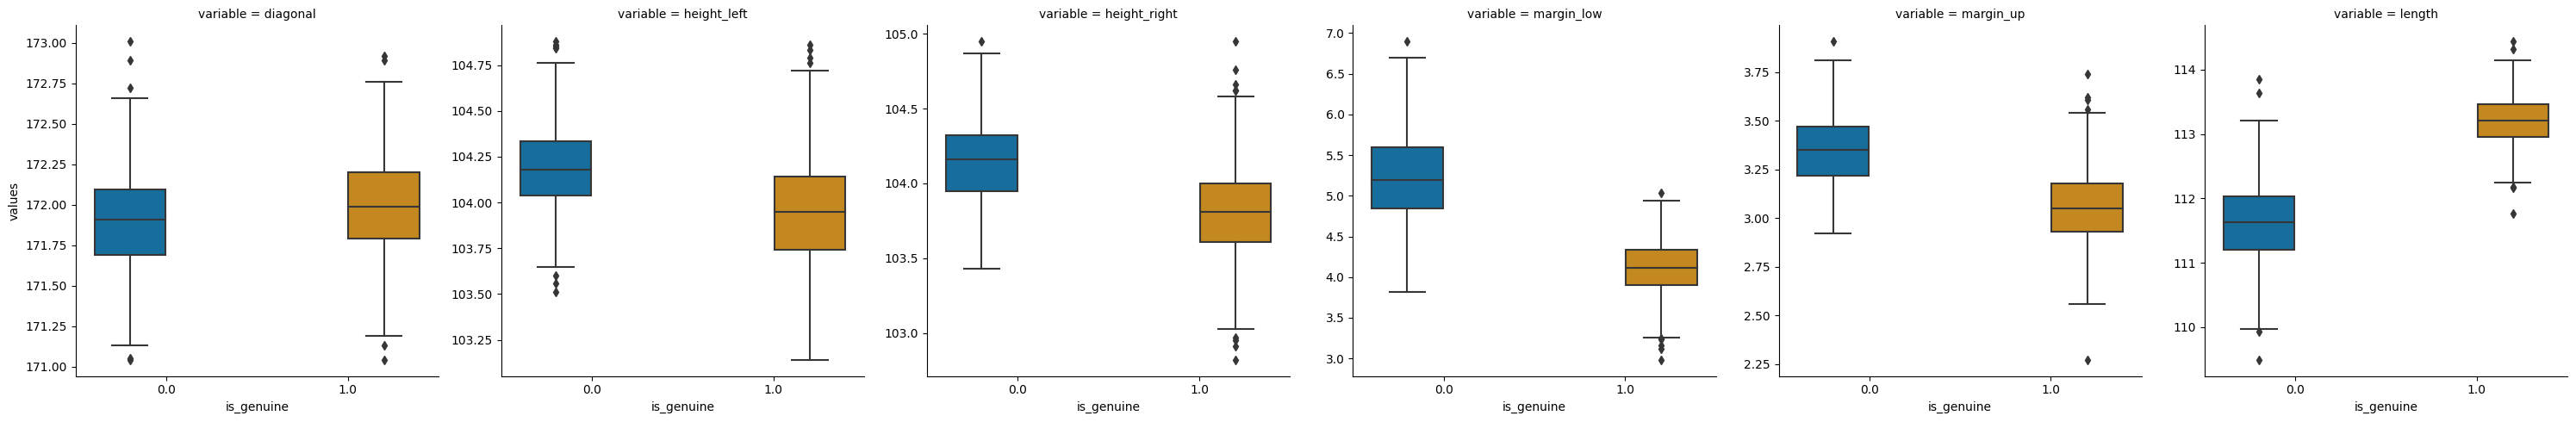

In [13]:

df_long = df_billet_.melt(id_vars='is_genuine', value_vars=df_billet_.columns, var_name='variable', value_name='values')

sns.catplot(kind='box', data=df_long, 
            col='variable', y='values', x='is_genuine', hue='is_genuine', palette="colorblind", sharey=False)
plt.tight_layout()
plt.show()

# Traitement des valeurs manquantes <a class="anchor" id="traitementnan"></a>

## Première régression linéaire  <a class="anchor" id="regressionlinéaire"></a>

In [14]:
reg_multi = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=df_billet_).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          2.60e-202
Time:                        16:06:55   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

In [15]:
reg_multi = smf.ols('margin_low~height_left+height_right+margin_up+length', data=df_billet_).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     329.5
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          4.80e-202
Time:                        16:06:56   Log-Likelihood:                -1004.9
No. Observations:                1463   AIC:                             2020.
Df Residuals:                    1458   BIC:                             2046.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.2656      7.048      0.747   

## Dataframe alternative <a class="anchor" id="dataframealternative"></a>

Je vais travailles sur un dataframe sans valeur manquante a partir du qu'elle je ferais ma prédiction afin de traiter les valeurs manquantes de mon dataframe originel 

In [16]:
df_full = df_billet_.dropna(inplace=False)
df_full.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.134720,-0.373624,-0.487177,-0.783032,-0.610412,0.850223
diagonal,0.134720,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,-0.373624,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.487177,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.610412,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.850223,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


#### Exploration du datarame alternantive <a class="anchor" id="exploration"></a>

In [17]:
df_full.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,0.663705,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.472603,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,0.000000,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,0.000000,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


In [18]:
df_full

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25


In [19]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   float64
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: float64(7)
memory usage: 91.4 KB


## Matrice de corrélation <a class="anchor" id="matricedecorrélation"></a>

Text(0.5, 1.0, 'Matrice de corrélation')

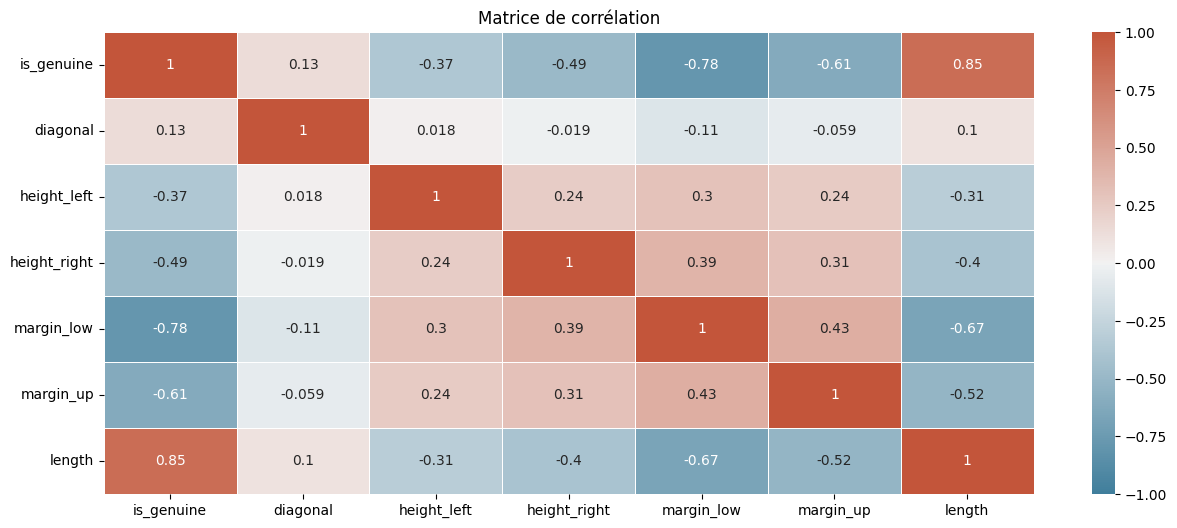

In [20]:
df_full = df_billet_.dropna(inplace=False)
colormap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(df_full.corr(),cmap = colormap,linewidth=.5,annot = True,vmax = 1,vmin = -1)
plt.title('Matrice de corrélation')

Text(0.5, 1.0, 'Répartition des donnée des deux variable les plus corrélé')

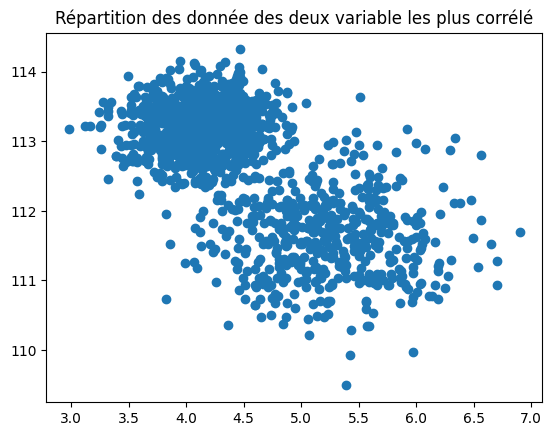

In [21]:
plt.scatter(x = 'margin_low', y = 'length', data = df_full)
plt.title('Répartition des donnée des deux variable les plus corrélé')

## Régression lineaire  du dataframe alternative <a class="anchor" id="regressionlineairedfalternative"></a>

In [22]:
reg_multi_full = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=df_full).fit()
print(reg_multi_full.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          2.60e-202
Time:                        16:06:57   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

In [23]:
reg_multi_full2 = smf.ols('margin_low~height_left+height_right+margin_up+length', data=df_full).fit()
print(reg_multi_full2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     329.5
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          4.80e-202
Time:                        16:06:57   Log-Likelihood:                -1004.9
No. Observations:                1463   AIC:                             2020.
Df Residuals:                    1458   BIC:                             2046.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.2656      7.048      0.747   

### Test de colinéarité des variables <a class="anchor" id="testdecolinéarité"></a>

In [24]:
variables = reg_multi_full.model.exog
[variance_inflation_factor(variables, i) 
for i in np.arange(1,variables.shape[1] )
    if i < 10
]

[1.0136128990686293,
 1.1382605736082516,
 1.2301145155560371,
 1.4044037781843617,
 1.576950145366582]

Pas de problème de colinéarite 

### Teste de la constance des variances<a class="anchor" id="constancevariance"></a>

In [25]:

_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi_full.resid, variables)
if pval < 0.05: 
        print("Pvalue inférieur a 0.05 on peu rejetet l'hypothèse de constances des variances")
else: 
        print("P_valeur supérieur a 0.05  on nee peu pas rejet l'hypothèse d'homoscéddasticité", pval)


Pvalue inférieur a 0.05 on peu rejetet l'hypothèse de constances des variances


### Recherche des valeurs atypiques et/ou influentes <a class="anchor" id="valatypiqueinfluente"></a>

In [26]:
alpha = 0.05
n = df_full.shape[0]
p = 6

In [27]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

calcule du leviers

In [28]:
analyses['levier'] = reg_multi_full.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

In [29]:
analyses.shape

(1463, 2)

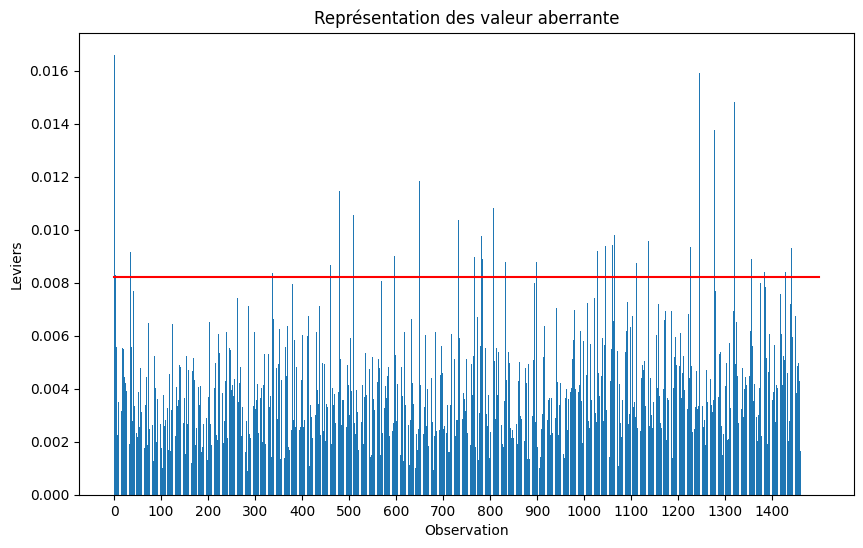

In [30]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.title('Représentation des valeur aberrante')
plt.show()

Je considère comme etant abbérate toute les valeur supérieur au levier

In [31]:
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
0,1,0.016606
2,3,0.008298
34,35,0.009156
52,53,0.013635
56,57,0.009087
...,...,...
1416,1417,0.008521
1417,1418,0.008870
1428,1429,0.008390
1441,1442,0.009325


In [32]:
df_full.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [33]:
df_full.shape

(1463, 7)

In [34]:
analyses.isna().sum()

obs       0
levier    0
dtype: int64

In [35]:
analyses.shape

(1463, 2)

On calcule les résidus studenisés

une forte valeur du rstudent caractérise une observation atypique 

In [36]:
analyses['rstudent'] = reg_multi_full.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

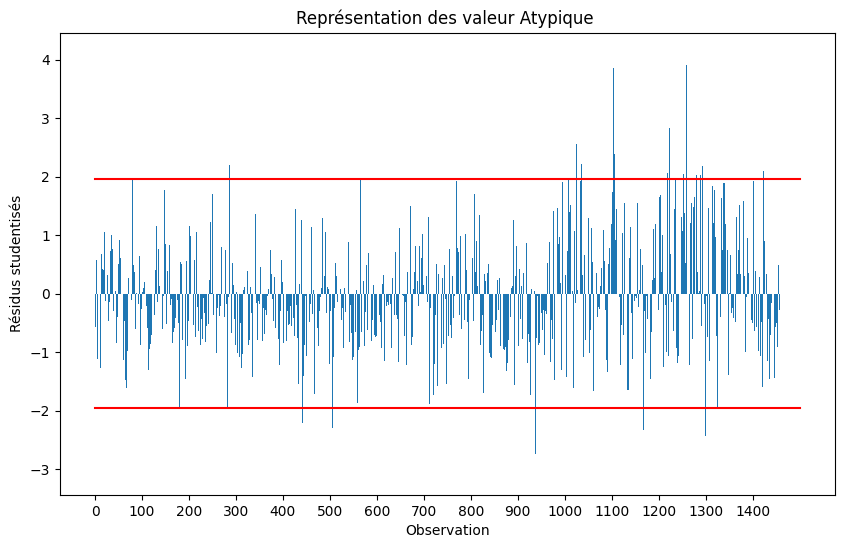

In [37]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.title('Représentation des valeur Atypique ')
plt.show()

Distance de Cook

une observation est considéré influente si Di > 5/n-p (distance de cook)

In [38]:
influence = reg_multi_full.get_influence().summary_frame()
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 5/(n-p)

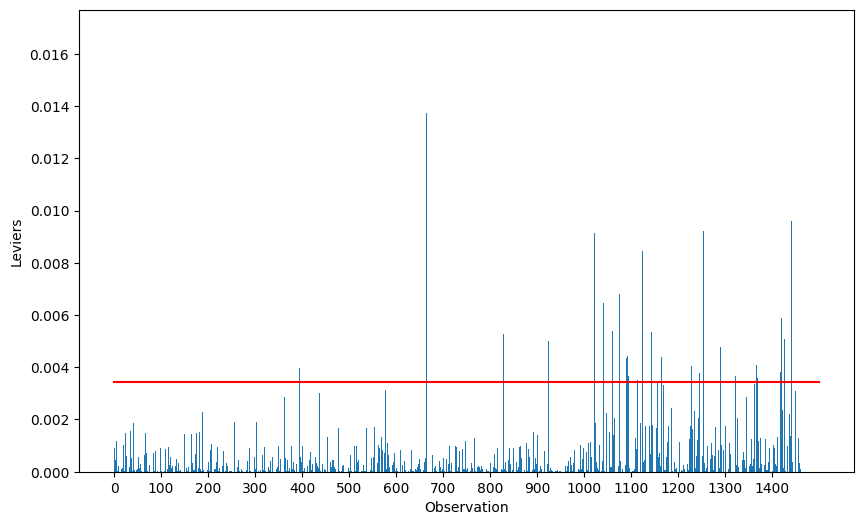

In [39]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

Test de nomalité

In [40]:
# shapiro(reg_multi2.resid)
res = stats.shapiro(reg_multi_full.resid)

if res.pvalue > 0.05:
    print('hypothèse de normaliter des résidus non remise en cause')
else :
    print('hypothèse de normalité des résidus remise en cause')

hypothèse de normalité des résidus remise en cause


In [41]:
df_full.columns

Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')

<!-- columns = ['diagonal', 'height_left', 'height_right', 'margin_low',
#         'margin_up', 'length']
# reg_backward = backward_selected(df_full[columns], 'margin_low') -->

Je retire les valeurs atypiques/abberantes

In [42]:
analyses

,obs,levier,rstudent,dcooks
0,1,0.016606,-0.563593,0.000894
1,2,0.006015,-0.769710,0.000597
2,3,0.008298,0.572488,0.000457
3,4,0.004467,-1.118681,0.000936
4,5,0.005558,-1.121058,0.001171
...,...,...,...,...
1458,1459,0.004307,-1.608823,0.000338
1459,1460,0.005672,-0.389864,0.003050
1460,1461,0.001643,1.269372,0.000110
1461,1462,0.002254,0.752677,0.000701


In [43]:
df_full_ = pd.merge(df_full, analyses,left_index=True, right_index=True)

In [44]:
df_full_levier = df_full_.loc[df_full_['levier'] < seuil_levier, :]

In [45]:
df_full_levier.shape

(1352, 11)

In [46]:
df_full_new = df_full_levier.loc[(df_full_levier['rstudent'] > -seuil_rstudent) & (df_full_levier['rstudent'] < seuil_rstudent) & (df_full_levier['dcooks'] < seuil_dcook) ]

In [47]:
df_full_new

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,obs,levier,rstudent,dcooks
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09,2,0.006015,-0.769710,0.000597
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51,4,0.004467,-1.118681,0.000936
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54,5,0.005558,-1.121058,0.001171
5,1.0,172.17,103.74,104.08,4.42,2.95,112.81,6,0.002642,0.161799,0.000012
6,1.0,172.34,104.18,103.85,4.58,3.26,112.81,7,0.002246,0.323349,0.000039
...,...,...,...,...,...,...,...,...,...,...,...
1458,0.0,171.65,104.00,104.53,5.69,3.41,111.09,1459,0.004307,-1.608823,0.000338
1459,0.0,171.78,104.31,103.82,6.19,3.25,111.14,1460,0.005672,-0.389864,0.003050
1460,0.0,171.99,104.28,104.48,5.27,3.46,110.94,1461,0.001643,1.269372,0.000110
1461,0.0,171.92,104.66,104.31,5.15,3.33,112.75,1462,0.002254,0.752677,0.000701


# Nouvelle régression linéaire <a class="anchor" id="nouvellereglin"></a>

In [48]:
reg_multi2 = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data=df_full_new).fit()
print(reg_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     263.1
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          1.73e-191
Time:                        16:07:06   Log-Likelihood:                -658.84
No. Observations:                1239   AIC:                             1330.
Df Residuals:                    1233   BIC:                             1360.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       28.2318      9.021      3.130   

In [49]:
reg_multii2 = smf.ols('margin_low~height_left+height_right+margin_up+length', data=df_full_new).fit()
print(reg_multii2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     325.0
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          4.79e-191
Time:                        16:07:06   Log-Likelihood:                -662.84
No. Observations:                1239   AIC:                             1336.
Df Residuals:                    1234   BIC:                             1361.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.7599      6.590      1.633   

C:\Users\ikram\AppData\Local\Temp\ipykernel_22536\1105577879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_new.drop(columns = {'levier','rstudent','dcooks','obs'},inplace = True)


Text(0.5, 1.0, 'Matrice de corrélation')

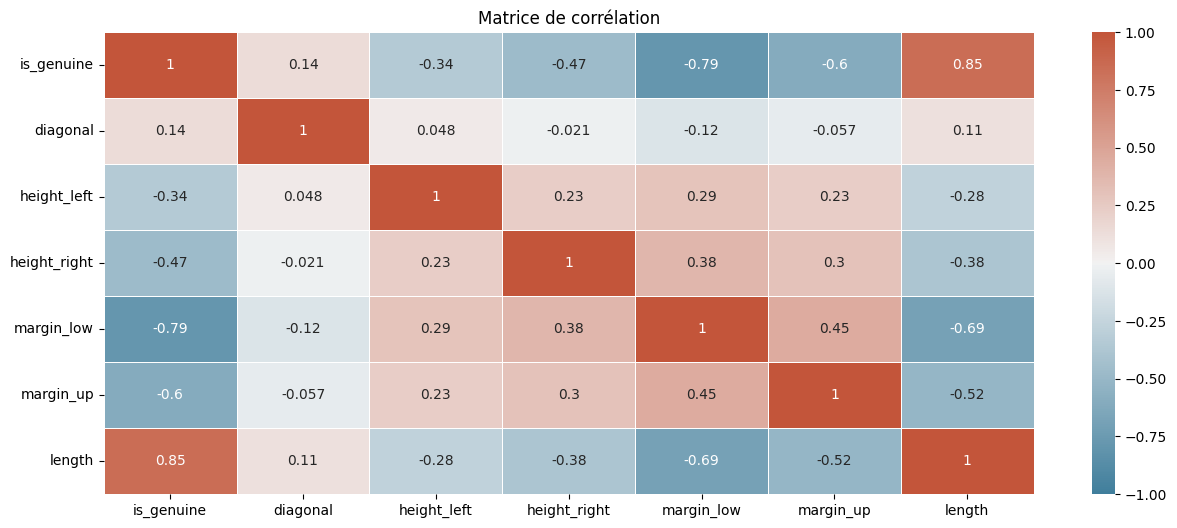

In [50]:
df_full_new.drop(columns = {'levier','rstudent','dcooks','obs'},inplace = True)
colormap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(15,6))
sns.heatmap(df_full_new.corr(),cmap = colormap,linewidth=.5,annot = True,vmax = 1,vmin = -1)
plt.title('Matrice de corrélation')

In [75]:
# sns.set()
# ax = sns.scatterplot(x="margin_low", y="length", data=df_full_new)
# ax.set(xlabel='margin_low', ylabel='length')

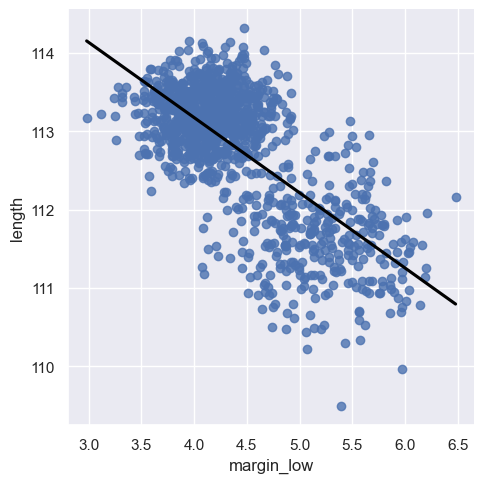

In [52]:
ax = sns.lmplot(x="margin_low", y="length", data=df_full_new, ci=None, line_kws={'color':'black'})
ax.set(xlabel='margin_low', ylabel='length')
plt.show()

Valeur ajusté en fonction des valeur observer 

C:\Users\ikram\AppData\Local\Temp\ipykernel_22536\3774382952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_new['ajust_s'] = reg_multi2.predict()


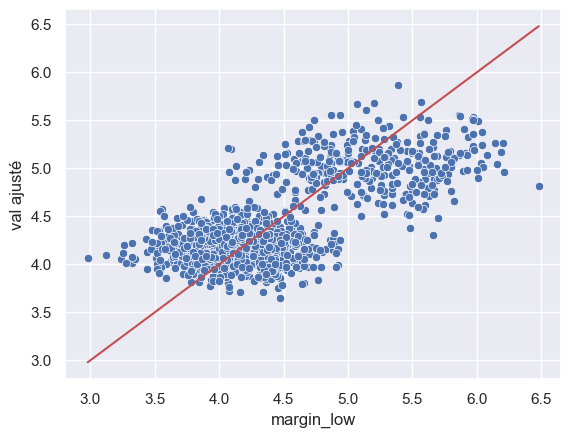

In [53]:
df_full_new['ajust_s'] = reg_multi2.predict()

X_plot = [df_full_new['margin_low'].min(), df_full_new['margin_low'].max()]

ax = sns.scatterplot(x="margin_low", y="ajust_s", data=df_full_new)
ax.set(xlabel='margin_low', ylabel='val ajusté')
plt.plot(X_plot, X_plot, color='r')
plt.show()

Représentation des résidus

In [54]:
df_full_new['residu_s'] = reg_multi2.resid

C:\Users\ikram\AppData\Local\Temp\ipykernel_22536\247129734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_new['residu_s'] = reg_multi2.resid


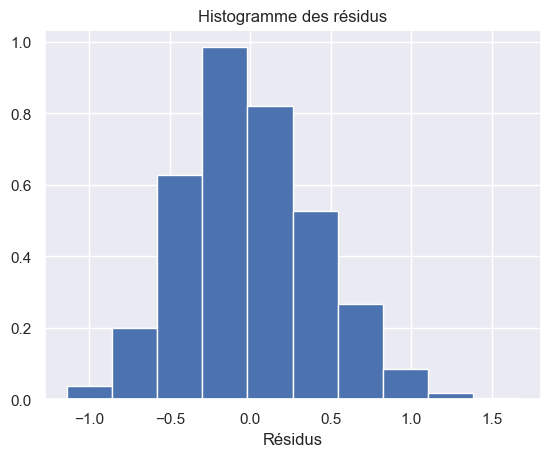

In [55]:
plt.hist(df_full_new['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
plt.show()

nous avons un histogramme pluto classic centré et a peu prés symétrique 

je teste la colinéariter des variables 

In [56]:
variables2 = reg_multi2.model.exog
[variance_inflation_factor(variables2, i) 
for i in np.arange(1,variables2.shape[1] )
    if i < 10
]

[1.019786345794441,
 1.1195520299244917,
 1.2129016294380393,
 1.397188481917738,
 1.5287795128434851]

pas de pb de colinéarité

In [57]:

_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi2.resid, variables2)
if pval < 0.05: 
        print("Pvalue inférieur a 0.05 on peu rejetet l'hypothèse de constances des variances")
else: 
        print("P_valeur supérieur a 0.05  on nee peu pas rejet l'hypothèse d'homoscéddasticité", pval)


Pvalue inférieur a 0.05 on peu rejetet l'hypothèse de constances des variances


In [58]:
df_full_new.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
ajust_s         0
residu_s        0
dtype: int64

### Seconde recherche des valeurs atypiques et/ou influentes <a class = "anchor" id="seconderecherche"></a>

In [59]:
alpha = 0.05
n = df_full_new.shape[0]
p = 6

In [60]:
analyses2 = pd.DataFrame({'obs':np.arange(1, n+1)})

In [61]:
analyses2['levier'] = reg_multi2.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

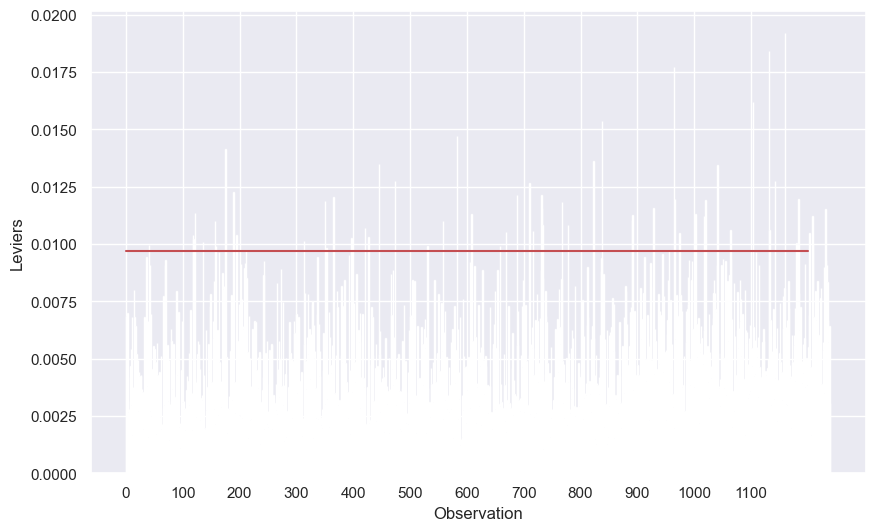

In [62]:
plt.figure(figsize=(10,6))
plt.bar(analyses2['obs'], analyses2['levier'])
plt.xticks(np.arange(0, 1200, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1200], [seuil_levier, seuil_levier], color='r')
plt.show()

In [63]:
analyses2.loc[analyses2['levier'] > seuil_levier, :].shape

(59, 2)

In [64]:
analyses2['rstudent'] = reg_multi2.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

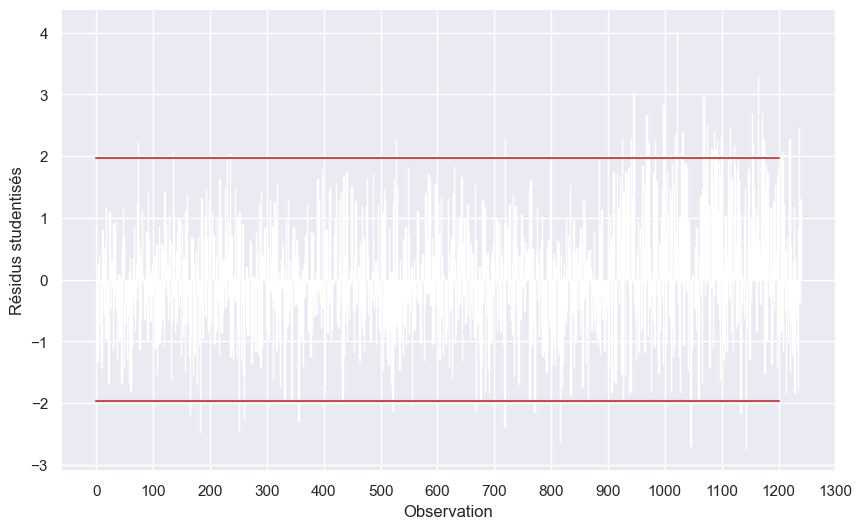

In [65]:
plt.figure(figsize=(10,6))
plt.bar(analyses2['obs'], analyses2['rstudent'])
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1200], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1200], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

In [66]:
influence = reg_multi2.get_influence().summary_frame()
analyses2['dcooks'] = influence['cooks_d']
seuil_dcook = 5/(n-p)

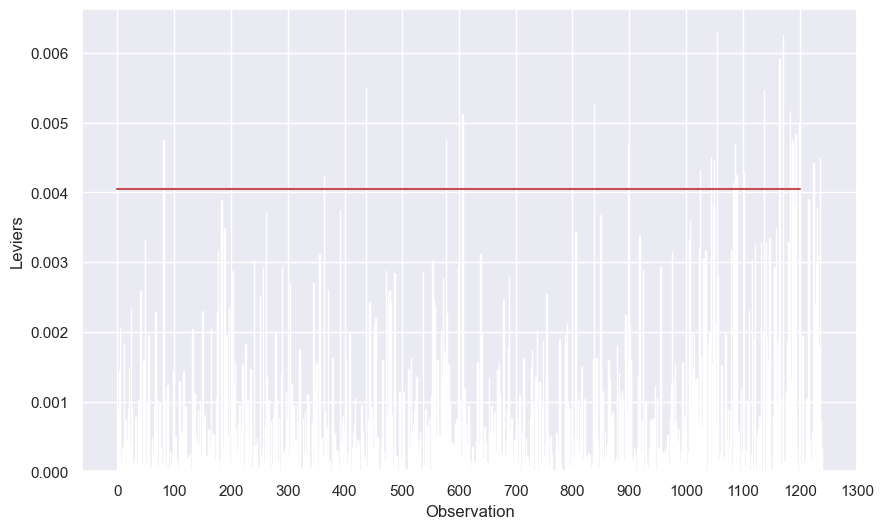

In [67]:
plt.figure(figsize=(10,6))
plt.bar(analyses2['obs'], analyses2['dcooks'],color = 'blue')
plt.xticks(np.arange(0, 1500, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1200], [seuil_dcook, seuil_dcook], color='r')
plt.show()

# Prédiction<a class="anchor" id="prédiction"></a>

In [68]:
print(reg_multi2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     263.1
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          1.73e-191
Time:                        16:07:16   Log-Likelihood:                -658.84
No. Observations:                1239   AIC:                             1330.
Df Residuals:                    1233   BIC:                             1360.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       28.2318      9.021      3.130   

In [69]:
y_predict = reg_multi2.predict()

In [70]:
empty_margin = df_billet_[pd.isnull(df_billet_.margin_low)]
empty_margin.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,1.0,171.94,103.89,103.45,NaN,3.25,112.79
99,1.0,171.93,104.07,104.18,NaN,3.14,113.08
151,1.0,172.07,103.80,104.38,NaN,3.02,112.93
197,1.0,171.45,103.66,103.80,NaN,3.62,113.27
241,1.0,171.83,104.14,104.06,NaN,3.02,112.36


In [71]:
y_predict = reg_multi2.predict(empty_margin)
display(y_predict.values)
df_billet_.loc[pd.isnull(df_billet_.margin_low),'margin_low'] = y_predict.values

array([4.3249077 , 4.36293877, 4.36850198, 4.31168266, 4.62561014,
       3.83638742, 4.17002895, 4.10538278, 4.13622439, 4.16280078,
       4.19248861, 3.74251765, 4.0318248 , 4.30284839, 4.1566301 ,
       4.07033667, 4.42444833, 4.46042443, 4.32256017, 4.06773285,
       3.60762926, 4.32430691, 4.06610347, 4.23946242, 3.87873106,
       3.74437837, 4.23771361, 4.65823766, 4.12771481, 5.00962277,
       4.77288685, 5.04997849, 5.03786808, 4.75242426, 5.70828467,
       5.14998209, 5.10727644])

In [72]:
df_billet_.loc[pd.isnull(df_billet_.margin_low)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


In [73]:
df_billet_.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [74]:
df_billet_.to_csv('dataframe.csv')

##

##

##